In [1]:
# packages
import random
import math
from time import perf_counter_ns
from matplotlib import pyplot as plt

In [2]:
# create Node class
class Node:
    def __init__(self, key, data):
        self.key = key
        self.data = data
        self.left = None
        self.right = None

    def insert(self, key, data):
        if self.key == key:
            self.data = data
        elif self.key > key:
            if self.left is None:
                self.left = Binary_search_tree(key, data)
            self.left.insert(key, data)
        else:
            if self.right is None:
                self.right = Binary_search_tree(key, data)
            self.right.insert(key, data)
    
    def get(self, key):
        if key < self.key:
            if self.left is None:
                return 'key (' + str(key) + ') not found'
            else:
                return self.left.get(key)
        elif key > self.key:
            if self.right is None:
                return 'key (' + str(key) + ') not found'
            else:
                return self.right.get(key)
        else:
            return self.data    
            
    def display(self):
        lines, *_ = self._display_aux()
        for line in lines:
            print(line)

    def _display_aux(self):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if self.right is None and self.left is None:
            line = '%s' % self.key
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # Only left child.
        if self.right is None:
            lines, n, p, x = self.left._display_aux()
            s = '%s' % self.key
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

        # Only right child.
        if self.left is None:
            lines, n, p, x = self.right._display_aux()
            s = '%s' % self.key
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

        # Two children.
        left, n, p, x = self.left._display_aux()
        right, m, q, y = self.right._display_aux()
        s = '%s' % self.key
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2   

In [3]:
# create Keyvalue class
class Keyvalue:
    def __init__(self, key, value):
        self.key = key
        self.value = value
              
    def __str__(self):
        return self.key
        
    def __lt__(self, other):
        return self.key.upper() < other.key.upper()
    

In [4]:
# create a balanced tree
def create_a_balanced_tree(list):
    if not list:
        return "error"
    mid = len(list) //2
    if len(list) == 1:
        return Node(list[0].key, list[0].value)
    root = Node(list[mid].key, list[mid].value)
    root.left= create_a_balanced_tree(list[:mid])
    if len(list) >= 3:
        root.right = create_a_balanced_tree(list[mid+1:])
    return root

In [5]:
# use merge sort to sort the list into order
def merge(l_list , r_list):
    sorted_list = []
    l_counter = r_counter = 0
    while l_counter < len(l_list) and r_counter < len(r_list):
        if l_list[l_counter] < r_list[r_counter]:
            sorted_list.append(l_list[l_counter])
            l_counter += 1
        else:
            sorted_list.append(r_list[r_counter])
            r_counter += 1

    if l_counter == len(l_list):
        sorted_list.extend(r_list[r_counter:])
    else:
        sorted_list.extend(l_list[l_counter:])
    return sorted_list

def merge_sort(input_list):
    if len(input_list) <= 1:
        return input_list
    middle = len(input_list)//2
    l_list = merge_sort(input_list[:middle])
    r_list = merge_sort(input_list[middle:])
    return merge(l_list, r_list)

In [7]:
#creating lists of 10000, 20000, 40000, 80000, 10000
list_10000 = []
for i in range (10000):
    list_10000.append(Keyvalue(i, random.randint(1,100)))
tree_10000 = create_a_balanced_tree(list_10000)

list_20000 = []
for i in range (20000):
    list_20000.append(Keyvalue(i, random.randint(1,100)))
tree_20000 = create_a_balanced_tree(list_20000)

list_40000 = []
for i in range (40000):
    list_40000.append(Keyvalue(i, random.randint(1,100)))
tree_40000 = create_a_balanced_tree(list_40000)

list_60000 = []
for i in range (60000):
    list_60000.append(Keyvalue(i, random.randint(1,100)))
tree_60000 = create_a_balanced_tree(list_60000)

list_80000 = []
for i in range (80000):
    list_80000.append(Keyvalue(i, random.randint(1,100)))
tree_80000 = create_a_balanced_tree(list_80000)

list_100000 = []
for i in range (100000):
    list_100000.append(Keyvalue(i, random.randint(1,100)))
tree_100000 = create_a_balanced_tree(list_100000)

In [8]:
# measure the time it takes to get the data of a node in a balanced tree
def Get_Average(list):
    sum = 0
    for item in list:
        sum += item
    return sum/len(list)

time = []
time_10000 = []
counter = 0
while True:
    start_time = perf_counter_ns()
    tree_10000.get(random.randint(0,10000))
    time_10000.append(perf_counter_ns() - start_time)
    counter += 1
    if counter == 100001:
        break
time.append(Get_Average(time_10000))

time_20000 = []
counter = 0
while True:
    start_time = perf_counter_ns()
    tree_20000.get(random.randint(0,20000))
    time_20000.append(perf_counter_ns() - start_time)
    counter += 1
    if counter == 100001:
        break
time.append(Get_Average(time_20000))

time_40000 = []
counter = 0
while True:
    start_time = perf_counter_ns()
    tree_40000.get(random.randint(0,40000))
    time_40000.append(perf_counter_ns() - start_time)
    counter += 1
    if counter == 100001:
        break
time.append(Get_Average(time_40000))

time_60000 = []
counter = 0
while True:
    start_time = perf_counter_ns()
    tree_60000.get(random.randint(0,60000))
    time_60000.append(perf_counter_ns() - start_time)
    counter += 1
    if counter == 100001:
        break
time.append(Get_Average(time_60000))

time_60000 = []
counter = 0
while True:
    start_time = perf_counter_ns()
    tree_60000.get(random.randint(0,60000))
    time_60000.append(perf_counter_ns() - start_time)
    counter += 1
    if counter == 100001:
        break
time.append(Get_Average(time_60000))

time_100000 = []
counter = 0
while True:
    start_time = perf_counter_ns()
    tree_100000.get(random.randint(0,100000))
    time_100000.append(perf_counter_ns() - start_time)
    counter += 1
    if counter == 100001:
        break
time.append(Get_Average(time_100000))

In [9]:
# print the time taken
time 

[3252.571634283657,
 3495.5832041679582,
 3903.632183678163,
 4100.961040389596,
 4407.779112208878,
 4293.39373606264]

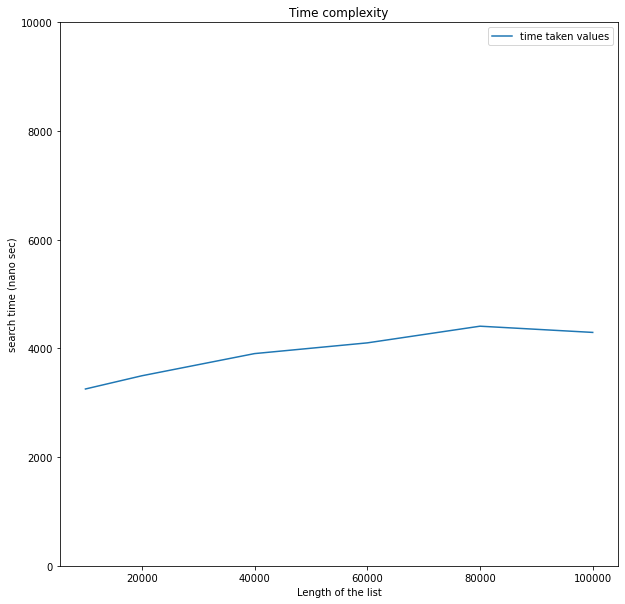

In [10]:
#ploting the Time taken for each case
plt.figure(figsize=(10,10))
plt.plot( [10000, 20000, 40000, 60000, 80000, 100000], time, label = "time taken values" )
y_lim = plt.ylim(ymin=0, ymax=10000)
x_lim = plt.xlim()

plt.title('Time complexity')
plt.xlabel("Length of the list")
plt.ylabel("search time (nano sec)")
plt.legend()
plt.show()